# <div align="center">Stochastic and Mini Batch Gradient Descent</div>
---------------------------------------------------------------------

In [46]:
import pandas as pd

import numpy as np
from numpy.linalg import inv

import math

from matplotlib import pyplot as plt
plt.style.use(['ggplot'])
%matplotlib inline
fig = plt.figure(figsize = (16,8))

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

np.random.seed(22)

<Figure size 1152x576 with 0 Axes>

In [47]:
class Optimizer:
    """
    
    Abstract optimizer base class.

    Note: this is the parent class of all optimizers, not an actual optimizer
          that can be used for training models.

    """
    
    def __init__(self, learning_rate, iterations, epochs, epsilon):
        """
        Constructor of base class
        
        Parameters:
            learning_rate (float)
            iterations (int)
            epochs (int)
            epsilon (float) - acceptable error
            
        Returns:
            None
        """
        
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.epochs = epochs
        self.epsilon = epsilon

    def cal_cost(self, theta, X, y):
        '''
        Calculates the cost for given X and Y.
        
        Parameters:
            theta = Vector of thetas 
            X     = Row of X's
            y     = Actual y's
            
        Returns:
            float (cost value)

        '''

        m = len(y)

        predictions = X.dot(theta)
        cost = 1/(2*m) * np.sum(np.square(predictions-y))
        
        return cost

In [48]:
class SGD(Optimizer):
    """
    Stochastic gradient descent.
    
    Note: this is the implementation of sgd by randomly choosing an element
          from X, this is not the way that we've learned in class
        
    """

    def __init__(self, learning_rate = 0.01, iterations = 100, epochs = 10, epsilon = 0.00001):
        """
        Constructor of sgd, calles parents (super) consructor
        
        Parameters:
            learning_rate (float)
            iterations (int)
            epochs (int)
            epsilon (float) - acceptable error
            
        Returns:
            None
        
        """
        super(SGD, self).__init__(learning_rate, iterations, epochs, epsilon)
    
    def fit(self, X, y):
        '''
        Fit function which is the actual stochastic gradient's algorithm
        
        Parameters:
            X    = Matrix of X with added bias units
            y    = Vector of y
            
        Returns:
            Returns the self
        '''

        m = len(y)
        self.theta = np.zeros((X.shape[1], 1))
        self.cost_history = []

        for e in range(self.epochs):            
            for it in range(self.iterations):
                cost = 0.0
                
                for i in range(m):
                    rand_ind = np.random.randint(0,m)
                    X_i = X[rand_ind,:].reshape(1,X.shape[1])
                    y_i = y[rand_ind].reshape(1,1)
                    prediction = np.dot(X_i, self.theta)

                    self.theta = self.theta -(1/m) * self.learning_rate * ( X_i.T.dot((prediction - y_i)))
                    cost += self.cal_cost(self.theta, X_i, y_i)
                
                self.cost_history = np.append(self.cost_history, cost)                
                
                if cost <= self.epsilon:
                    return self
                
        return self
    
    def predict(self, X):
        """
        Predicts the value after the model has been trained.

        Parameters:
            x : array-like, shape = [n_samples, n_features]
                Test samples

        Returns:
            Predicted value

        """
        return np.dot(X, self.theta)

In [49]:
class MBGD(Optimizer):
    """
    Mini batch gradient descent.
    
    Note: this also covers stochastic descent we learned in class (with batch_size=1)
        
    """

    def __init__(self, learning_rate = 0.01, iterations = 100, epochs = 10, batch_size = 10, epsilon = 0.00001):
        """
        Constructor of mini batch gd, calles parents (super) consructor
        
        Parameters:
            learning_rate (float)
            iterations (int)
            epochs (int)
            epsilon (float) - acceptable error
            
        Returns:
            None
        
        """
        super(MBGD, self).__init__(learning_rate, iterations, epochs, epsilon)
        self.batch_size = batch_size
    
    def fit(self, X, y):
        '''
        Fit function which is the actual stochastic gradient's algorithm
        
        Parameters:
            X    = Matrix of X without added bias units
            y    = Vector of y
            
        Returns:
            Returns the self
        '''

        m = len(y)
        self.theta = np.zeros((X.shape[1]+1, 1))
        self.cost_history = []
        n_batches = math.floor(m / self.batch_size)

        for e in range(self.epochs):
            
            for it in range(self.iterations):
                cost = 0.0
                indices = np.random.permutation(m)
                X = X[indices]
                y = y[indices]
                
                for i in range(0, m, self.batch_size):
                    X_i = X[i:i + self.batch_size]
                    y_i = y[i:i + self.batch_size]
                    X_i = np.c_[np.ones(len(X_i)),X_i]
                    prediction = np.dot(X_i, self.theta)

                    self.theta = self.theta - (1/m) * self.learning_rate * ( X_i.T.dot((prediction - y_i)))
                    cost += self.cal_cost(self.theta, X_i, y_i)
                    
                self.cost_history = np.append(self.cost_history, cost)
                
                if cost <= self.epsilon:
                    return self

        return self
    
    def predict(self, X):
        """
        Predicts the value after the model has been trained.

        Parameters:
            x : array-like, shape = [n_samples, n_features]
                Test samples

        Returns:
            Predicted value

        """
        X = np.c_[np.ones(len(X)),X]
        
        return np.dot(X, self.theta)

In [50]:
def mse(actual, predicted):
    """
    Calculate mean squared error
    
    Parameters:
        actual (nd.array) - actual values
        predicted (nd.array) - predicted values
    
    Return:
        float(mse)
    """
    return (np.square(actual - predicted)).mean()

# Data points 

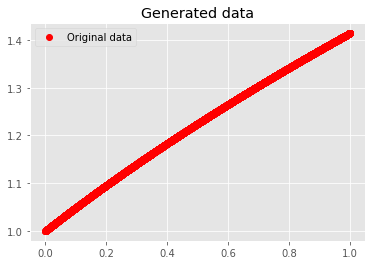

In [51]:
# Number of data points 
n = 10000

# Datapoints generation
X = np.random.random(n).reshape((n, 1))
y = np.sqrt(1+X)

# Data plotting
plt.plot(X, y, 'ro', label ='Original data')
plt.title('Generated data')
plt.legend()
plt.show()

In [52]:
# Train/ Test/ Validation datasets construction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=22)

In [53]:
# For stochastic gradient descent only

int = np.ones(shape=y_train.shape[0])[..., None]
X_train_with_ones = np.concatenate((int, X_train), 1)

int = np.ones(shape=y_test.shape[0])[..., None]
X_test_with_ones = np.concatenate((int, X_test), 1)

int = np.ones(shape=y_val.shape[0])[..., None]
X_val_with_ones = np.concatenate((int, X_val), 1)

# Parameter Tuning and Actual Predicting for SGD

In [54]:
lr =0.01
n_iter = 100

epochs = [1, 5, 10]
mse_e = []

for i in range(len(epochs)):
    sgd = SGD(learning_rate=lr, iterations=n_iter, epochs=epochs[i], epsilon=0.0000001)
    sgd.fit(X_train_with_ones, y_train)
    
    prediction = sgd.predict(X_val_with_ones)
    
    mse_e.append(mse(y_val, prediction ))

In [55]:
best_epoch_index = np.argmin(mse_e)

best_epoch = epochs[best_epoch_index]

In [56]:
sgd = SGD(learning_rate=0.01, iterations=100, epochs=best_epoch, epsilon=0.00001)

sgd.fit(X_train_with_ones, y_train)

predicted_values_sgd = sgd.predict(X_test_with_ones)

MSE in Test dataset:  0.00027591534299877435


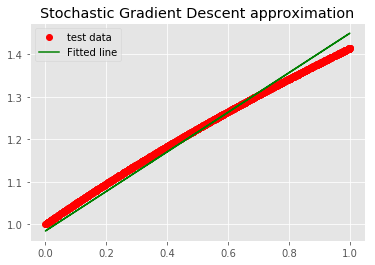

In [57]:
print('MSE in Test dataset: ', mse(y_test, predicted_values_sgd))

plt.plot(X_test, y_test, 'ro', label ='test data')
plt.plot(X_test, predicted_values_sgd, label ='Fitted line', color='green')
plt.title('Stochastic Gradient Descent approximation')
plt.legend()
plt.show()

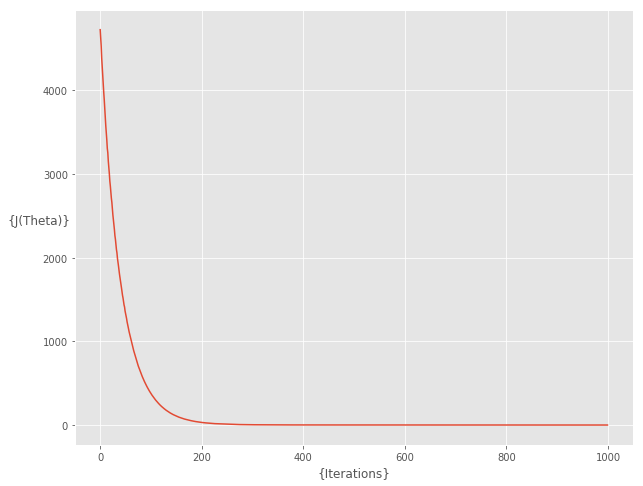

In [58]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(len(sgd.cost_history)),sgd.cost_history)

# Parameter Tuning and Actual Predicting for MBGD

In [59]:
lr =0.001
n_iter = 1000
batch_size = 100

epochs = [1, 5, 10]
mse_e = []

for i in range(len(epochs)):
    mbgd = MBGD(learning_rate=lr, iterations=n_iter, epochs=epochs[i], epsilon=0.0000001, batch_size=batch_size)
    mbgd.fit(X_train, y_train)
    
    prediction = mbgd.predict(X_val)
    
    mse_e.append(mse(y_val, prediction ))

In [60]:
best_epoch_index = np.argmin(mse_e)

best_epoch = epochs[best_epoch_index]

In [61]:
mbgd = MBGD(learning_rate=0.001, iterations=1000, epochs=best_epoch, epsilon=0.0000001, batch_size=100)

mbgd.fit(X_train, y_train)

predicted_values_mbgd = mbgd.predict(X_test)

MSE in Test dataset:  0.0002758698864517819


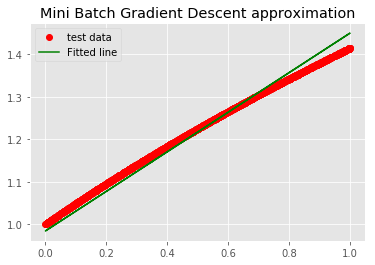

In [62]:
print('MSE in Test dataset: ', mse(y_test, predicted_values_mbgd))

plt.plot(X_test, y_test, 'ro', label ='test data')
plt.plot(X_test, predicted_values_mbgd, label ='Fitted line', color='green')
plt.title('Mini Batch Gradient Descent approximation')
plt.legend()
plt.show()

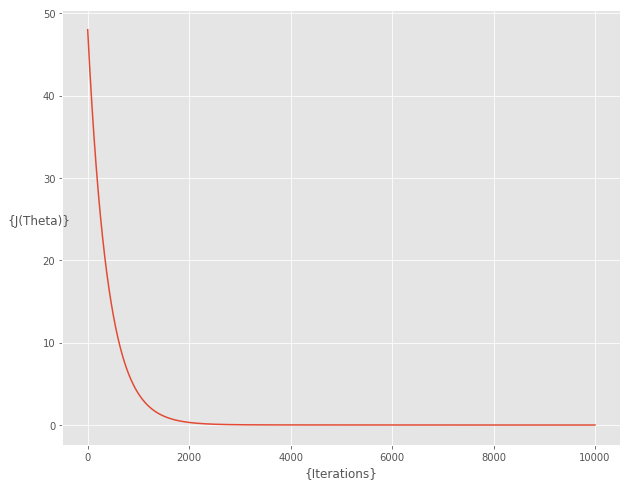

In [63]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(len(mbgd.cost_history)),mbgd.cost_history)

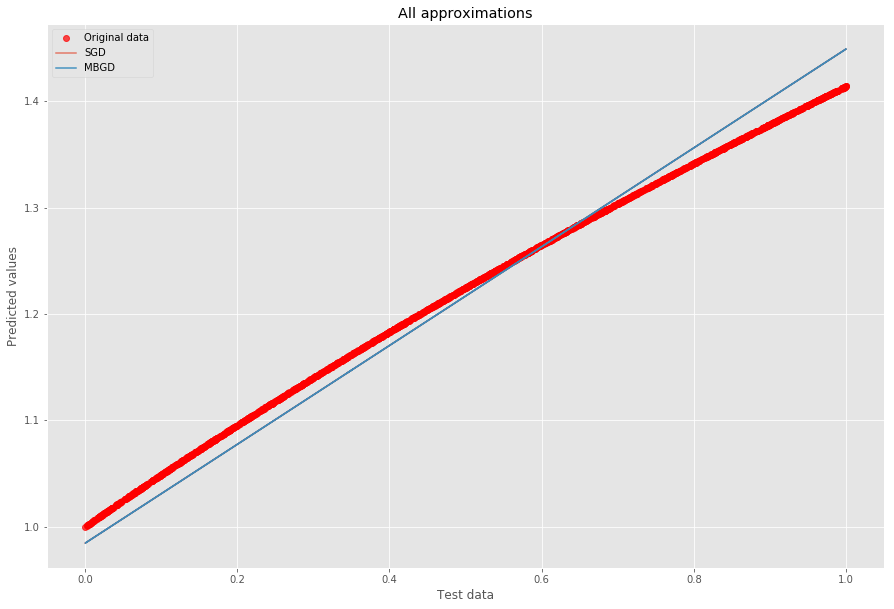

In [66]:
plt.figure(figsize = (15, 10))

plt.plot(X_test, y_test, 'ro', label ='Original data', alpha=0.7)

plt.plot(X_test, predicted_values_sgd, label = 'SGD', alpha = 0.7)
plt.plot(X_test, predicted_values_mbgd, label = 'MBGD', alpha = 0.9)

plt.title('All approximations')
plt.xlabel('Test data')
plt.ylabel('Predicted values')
plt.legend()
plt.show()